# Final Project for DCSI 100

In [3]:
library(tidyverse)
library(repr)
library(infer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Introduction

The `players.csv` dataset is from a Minecraft server by a research group, Pacific Laboratory for Artificial Intelligence, run by Frank Wood at UBC. They recorded some basic information about the players, such as their `Age`, `played_hours`, `experience`, `gender`, and their `name`, as well as whether or not they are `sunscribed` to their newsletter, etc. The goal of the project is to help AI in acting like a real Minecraft player. 

The question I will try to answer: Which variable, out of `Age`, `experience`, and `played_hours`  most effectively predicts if a player will `subscribe` to the newsletter?


In [4]:
players <- read_csv("players.csv")
# sessions <- read_csv("sessions.csv")

players
# sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the dataset above, there are 7 column variables, withthe following names:

`experience` (character): the player's skill level (listed as Amateur, Beginner, Regular, Pro, and Veteran)

`subscribe` (logical): if the player has subscribed to the game-related newsletter

`hashedEmail`(character): the player's unique identifier

`played_hours`(double): how many hours each player has played the game

`names`(character): name of each player

`gender`(character): gender of each player

`Age`(double): age of each player

There are 196 rows, each representing a single player observation, meaning that there are 196 observations.

## Methods & Results

#### Loading and Cleaning the data 

Since our goal for this dataset is to find out which player characteristics and behaviours are most predictive of newsletter subscription, `subscribe` is our main categorical label (which we will also to convert into a factor). This logical variable has only two possibilities: `TRUE` (that they have subscribed) or `FALSE` (that they are not subscribed to the newsletter). We will also have to turn the `experience` label into a categorical label since it is currently a character variable.

#### Clean the data:

In [14]:
player_data <- players |>
  select(subscribe, played_hours, experience, Age,) |>
  mutate(subscribe = as.factor(subscribe), experience = as.factor(experience))
player_data

subscribe,played_hours,experience,Age
<fct>,<dbl>,<fct>,<dbl>
TRUE,30.3,Pro,9
TRUE,3.8,Veteran,17
FALSE,0.0,Veteran,17
⋮,⋮,⋮,⋮
FALSE,0.0,Amateur,17
FALSE,2.3,Amateur,17
TRUE,0.2,Pro,NA


#### Visualizing how subscription varies with player experince level:

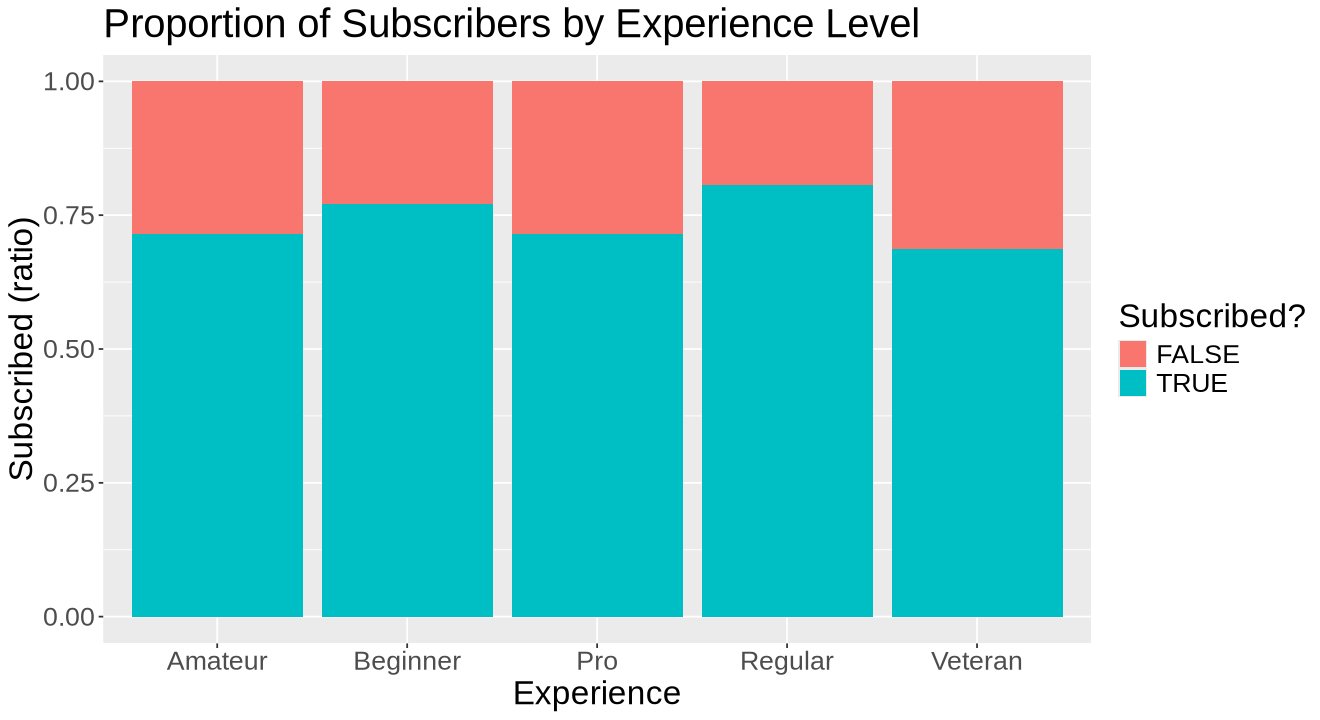

In [19]:
options(repr.plot.width=11, repr.plot.height=6)
#ratio of subscribed people in relation to their experience with the game
experience_plot <- ggplot(player_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Subscribers by Experience Level",
       x = "Experience",
       y = "Subscription (ratio)",
       fill = "Subscribed") +
theme(text = element_text(size = 20))
experience_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


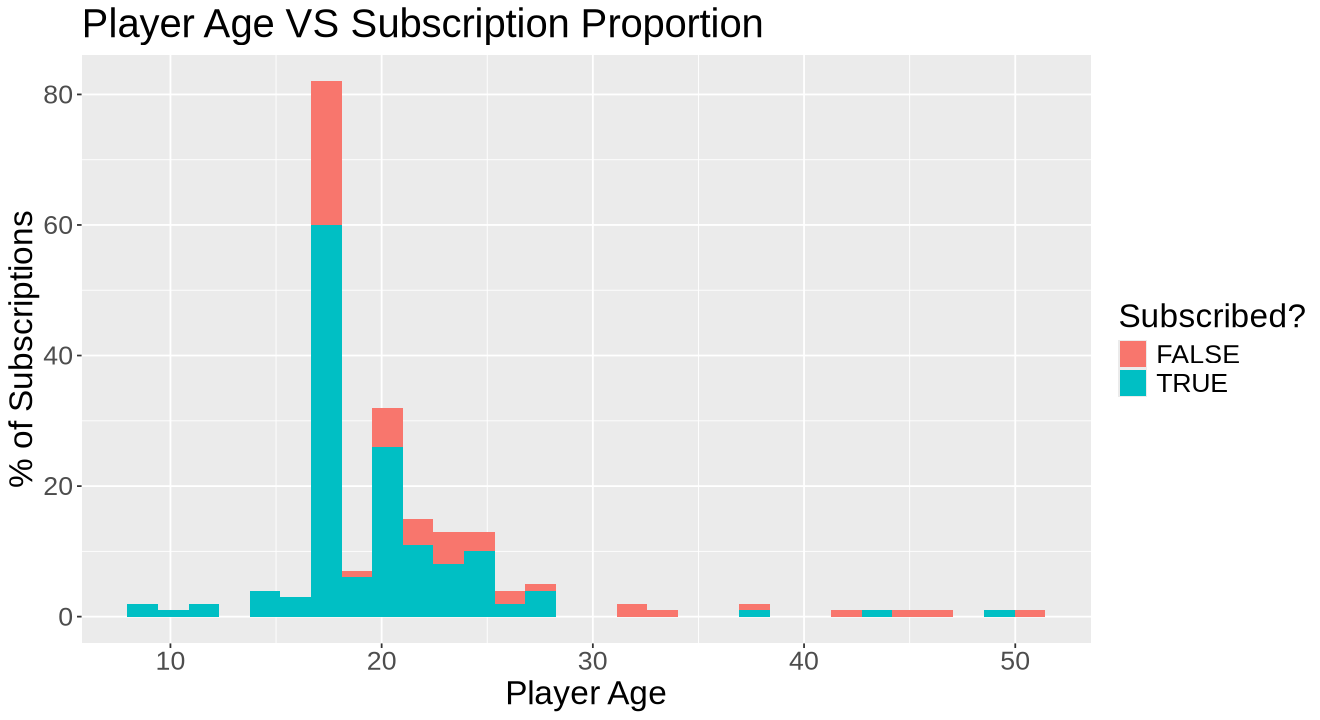

In [21]:
#ratio of subscribed people in relation to their age
age_plot <- player_data |> ggplot (aes (x = Age, fill = subscribe)) +
    geom_histogram () +
    labs(title = "Player Age VS Subscription Proportion",
         x = "Player Age",
         y = "Subscription",
         fill = "Subscribed?") +
    theme (text = element_text (size = 20))
age_plot


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


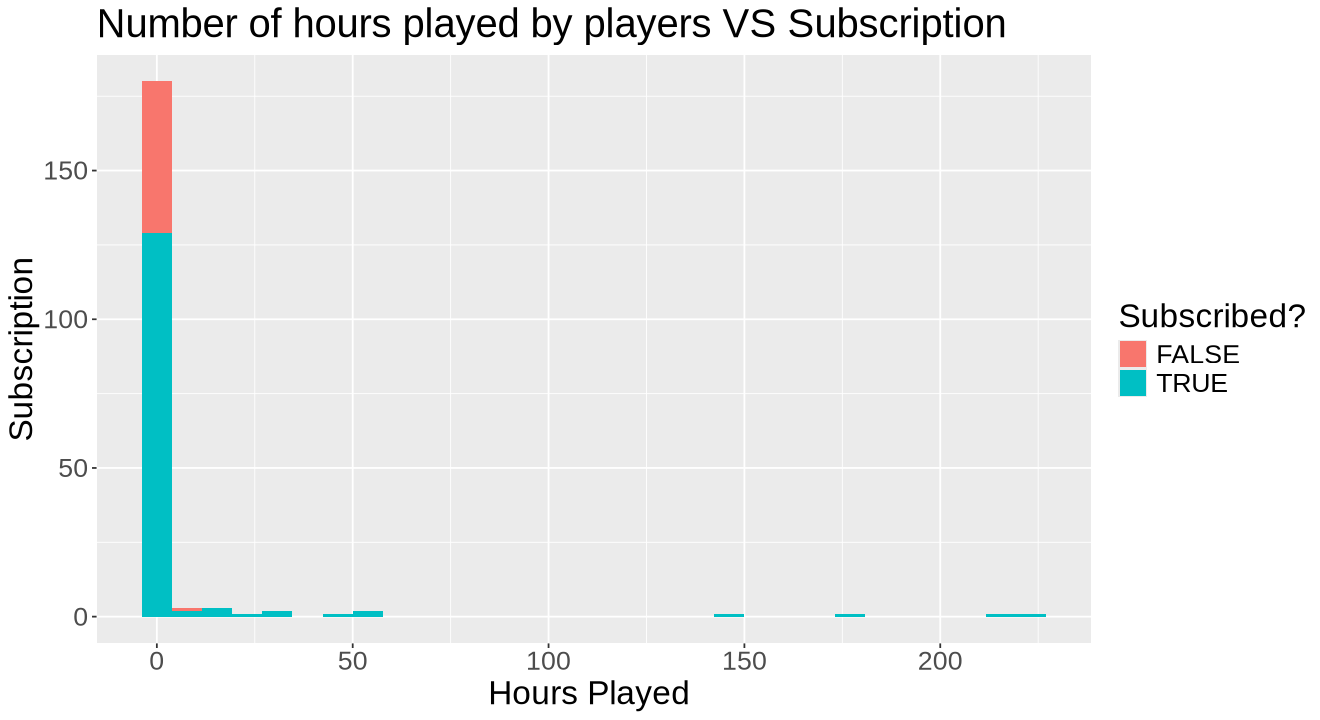

In [22]:
#ratio of subscribed people in relation to their experice with the game
time_plot <- player_data |> ggplot (aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    labs(title = "Number of hours played by players VS Subscription",
         x = "Hours Played ",
         y = "Subscription",
         fill = "Subscribed?") +
    theme (text = element_text (size = 20))
time_plot

As we can see, the played hours variable is mainly concentrated under 10 hours (which means that its not standardized), thefore to fix this, the subscription range can be separated into two graphs:



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 185 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


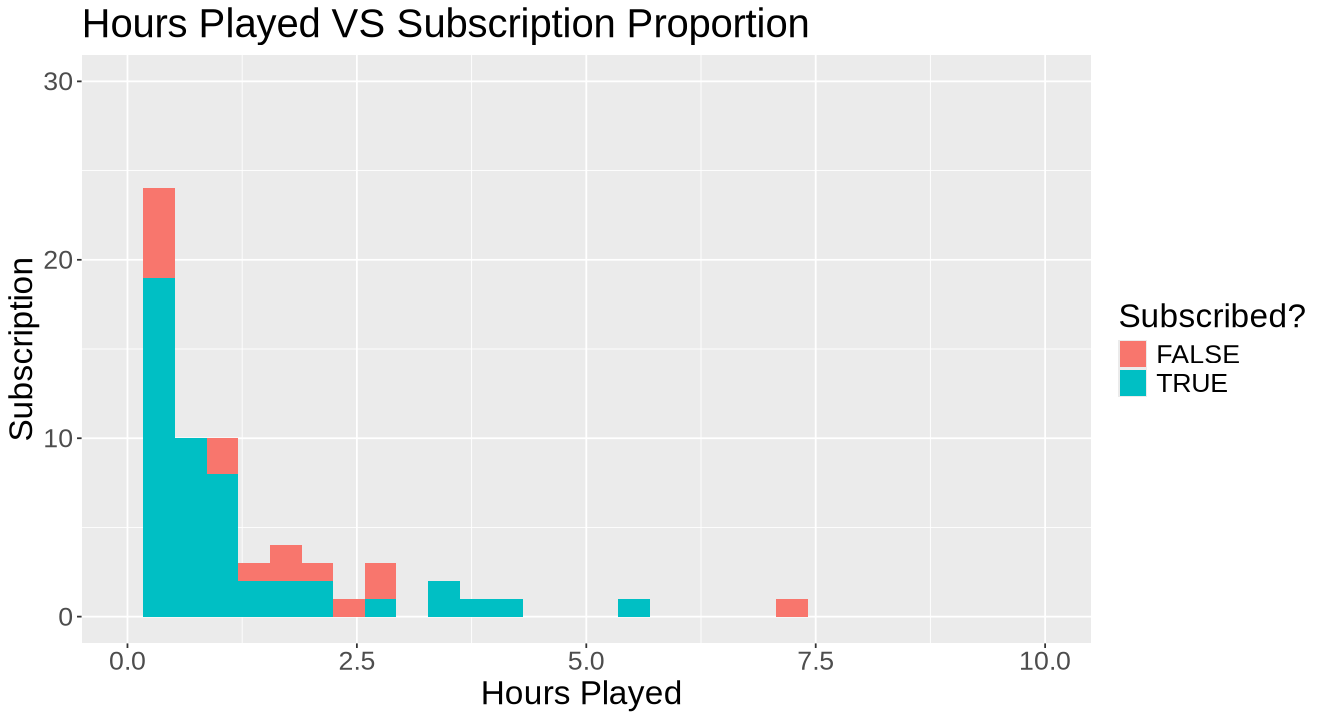

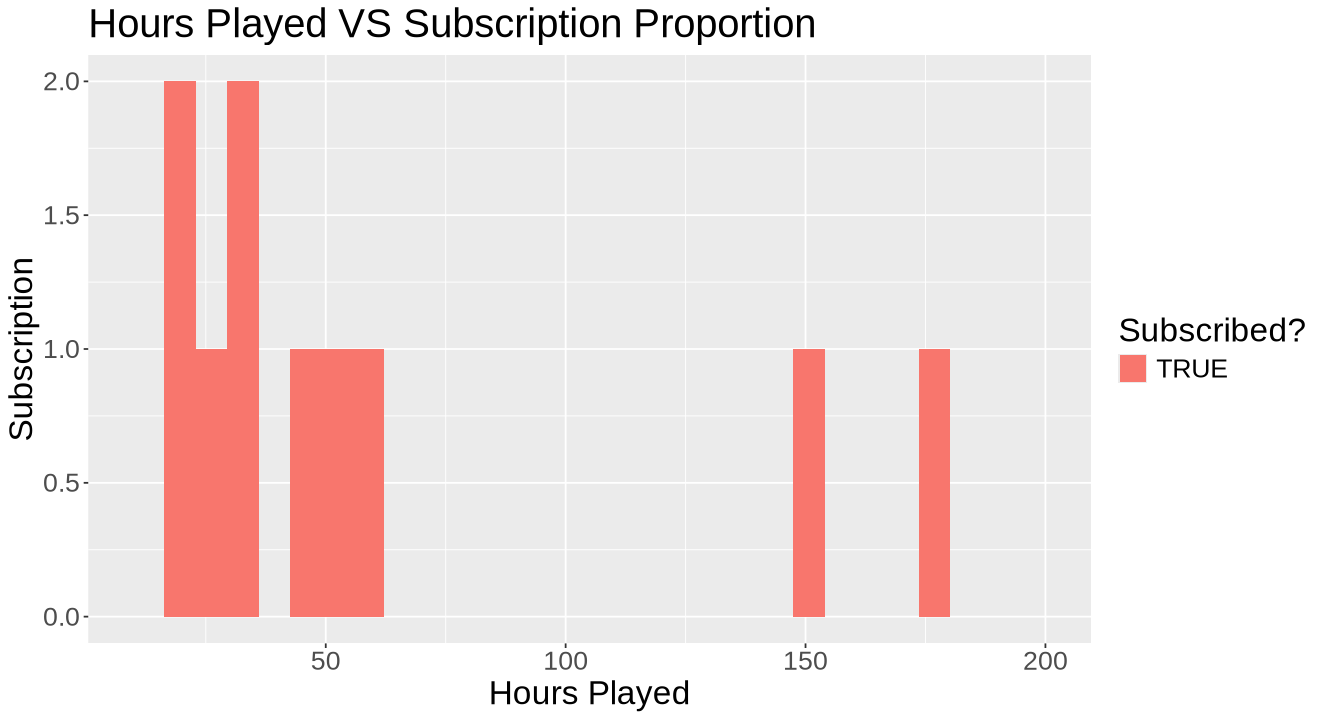

In [32]:
hours_plot_10 <- player_data |> ggplot(aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    xlim(c (0, 10)) +
    ylim(c (0, 30)) +
    labs(title="Hours Played VS Subscription Proportion",
         x = "Hours Played ",
         y = "Subscription",
         fill = "Subscribed?") + 
    theme (text = element_text (size = 20))
hours_plot_10

hours_plot_after_10 <- player_data |> ggplot (aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    xlim (c (10, 200)) +
    labs(title = "Hours Played VS Subscription Proportion",
         x = "Hours Played",
         y = "Subscription",
         fill = "Subscribed?") + 
    theme (text = element_text (size = 20))
hours_plot_after_10
